In [1]:
import sqlite3 as sql
import pandas as pd
import datetime
import csv

In [2]:
conn = sql.connect('Data.sqlite')
fire = pd.read_sql('SELECT * FROM Fires', conn)

In [3]:
type(fire)

pandas.core.frame.DataFrame

In [4]:
fire.shape

(892007, 39)

In [6]:
fire.head(10)

,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,...,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape
0,1,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,0511,Plumas National Forest,...,A,40.036944,-121.005833,5.0,USFS,CA,63,063,Plumas,b'\x00\x01\xad\x10\x00\x00\xe8d\xc2\x92_@^\xc0...
1,2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.933056,-120.404444,5.0,USFS,CA,61,061,Placer,b'\x00\x01\xad\x10\x00\x00T\xb6\xeej\xe2\x19^\...
2,3,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.984167,-120.735556,13.0,STATE OR PRIVATE,CA,17,017,El Dorado,b'\x00\x01\xad\x10\x00\x00\xd0\xa5\xa0W\x13/^\...
3,4,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.559167,-119.913333,5.0,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00\x94\xac\xa3\rt\xfa]...
4,5,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.559167,-119.933056,5.0,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00@\xe3\xaa.\xb7\xfb]\...
5,6,6,FS-1418849,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.635278,-120.103611,5.0,USFS,CA,5,005,Amador,b'\x00\x01\xad\x10\x00\x00\xf0<~\x90\xa1\x06^\...
6,7,7,FS-1418851,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.688333,-120.153333,5.0,USFS,CA,17,017,El Dorado,b'\x00\x01\xad\x10\x00\x00$o\x996\xd0\t^\xc0h\...
7,8,8,FS-1418854,FED,FS-FIRESTAT,FS,USCASHF,Shasta-Trinity National Forest,0514,Shasta-Trinity National Forest,...,B,40.968056,-122.433889,13.0,STATE OR PRIVATE,CA,None,None,None,b'\x00\x01\xad\x10\x00\x00t)\xe8\xd5\xc4\x9b^\...
8,9,9,FS-1418856,FED,FS-FIRESTAT,FS,USCASHF,Shasta-Trinity National Forest,0514,Shasta-Trinity National Forest,...,B,41.233611,-122.283333,13.0,STATE OR PRIVATE,CA,None,None,None,"b'\x00\x01\xad\x10\x00\x00\xdc\x8d\x1e""""\x92^\..."
9,10,10,FS-1418859,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.548333,-120.149167,5.0,USFS,CA,5,005,Amador,b'\x00\x01\xad\x10\x00\x00dS\\\xf2\x8b\t^\xc0\...


In [45]:
fire["DISCOVERY_DATE"].count()

1880465

In [49]:
fire["CONT_DATE"].count()

988934

In [7]:
fire["FIRE_SIZE"].min()

1e-05

In [3]:
fire.dropna(subset=["DISCOVERY_DATE", "DISCOVERY_TIME","CONT_DATE","CONT_TIME"],inplace=True)

In [4]:
def jd2cal(jd_val):
    # print(jd_val)
    mjd_val = int(jd_val-2400000.5)
    #print(mjd_val)
    start_time = datetime.date(1858, 11, 17)
    end_date = start_time + datetime.timedelta(days=mjd_val)
    return end_date.strftime("%m/%d/%Y")
    

In [5]:
import numpy as np
import haversine as hs

fire.head()
df = pd.DataFrame()

print(min(fire["LATITUDE"]))
print(max(fire["LATITUDE"]))
print(min(fire["LONGITUDE"]))
print(max(fire["LONGITUDE"]))

bottomLeft = (min(fire["LATITUDE"]), min(fire["LONGITUDE"]))
bottomRight = (min(fire["LATITUDE"]), max(fire["LONGITUDE"]))
topLeft = (max(fire["LATITUDE"]), min(fire["LONGITUDE"]))
topRight = (max(fire["LATITUDE"]), max(fire["LONGITUDE"]))

length = hs.haversine(bottomLeft,bottomRight)
width = hs.haversine(bottomLeft,topLeft)
print(length)
print(width)

cols = np.linspace(bottomLeft[1], bottomRight[1], num=600)
rows = np.linspace(bottomLeft[0], topLeft[0], num=300)
#cols = [round(num,8) for num in cols]
#rows = [round(num,8) for num in rows]

df_cols = np.searchsorted(cols, fire["LONGITUDE"])
df_row = np.searchsorted(rows, fire["LATITUDE"])

col = [str('%.4f'%round(int,4)) for int in cols[df_cols]]
row = [str('%.4f'%round(int,4)) for int in rows[df_row]]

temp = []
for index,val in enumerate(col):
    temp.append(col[index]+','+row[index])

df["LONGITUDE"] = fire["LONGITUDE"]
df["LATITUDE"] = fire["LATITUDE"]
df["LONG/LAT"] = temp
df["DISCOVERY_DATE"] = fire["DISCOVERY_DATE"]
df["DISCOVERY_TIME"] = fire["DISCOVERY_TIME"]
df["CONT_DATE"] = fire["CONT_DATE"]
df["CONT_TIME"] = fire["CONT_TIME"]
df["FIRE_SIZE"] = fire["FIRE_SIZE"]
#df["STAT_CAUSE_DESCR"] = fire["STAT_CAUSE_DESCR"]
#df["LONG"] = cols[df_cols]
#df["LAT"] = rows[df_row]
#df = df.sort_values(by=["LONG","LAT"])

df.to_csv('Data_with_category.csv')

17.93972222
70.3306
-168.87
-65.25694444
10762.116332162086
5825.607858252318


In [6]:
gk = df.groupby("LONG/LAT")

In [7]:
LL_list = df["LONG/LAT"].unique()
LL_list = LL_list.tolist()
print(len(LL_list))

23798


In [8]:
Dataset_list = []
Data_csv_list = []
for LL in LL_list:
    temp_list = [None]*4
    LL_df = gk.get_group(LL)
    # if(len(LL_df) > 3):
    #     LL_df = LL_df.sample(3)
    LL_df = LL_df.sort_values(by=["DISCOVERY_DATE"],ascending=False)
    LL_df = LL_df.head(1)
    Dataset_list.append(LL_df)
    temp_list[0] = LL.split(',')[0]
    temp_list[1] = LL.split(',')[1]
    temp_list[2] = jd2cal(LL_df['DISCOVERY_DATE']+83)
    temp_list[3] = jd2cal(LL_df['CONT_DATE']+90)
    Data_csv_list.append(temp_list)
    

In [9]:
temp_val = Dataset_list[0]
# .loc[0]["DISCOVERY_DATE"]
temp_val

,LONGITUDE,LATITUDE,LONG/LAT,DISCOVERY_DATE,DISCOVERY_TIME,CONT_DATE,CONT_TIME,FIRE_SIZE
1795284,-120.966667,40.144722,"-120.9554,40.1927",2457363.5,1730,2457363.5,1800,0.1


In [11]:
temp_val.iloc[0]['DISCOVERY_DATE']

2457363.5

In [10]:
Dataset_list[0].columns.values.tolist()

['LONGITUDE',
 'LATITUDE',
 'LONG/LAT',
 'DISCOVERY_DATE',
 'DISCOVERY_TIME',
 'CONT_DATE',
 'CONT_TIME',
 'FIRE_SIZE']

In [10]:
import csv
with open('Data.csv', 'w', newline='') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=',',quotechar='|', quoting=csv.QUOTE_MINIMAL)
    # spamwriter.writerow(['lat', 'long'])
    for val in Data_csv_list:
        # temp = val.split(',')
        spamwriter.writerow([val[0], val[1], val[2], val[3]])

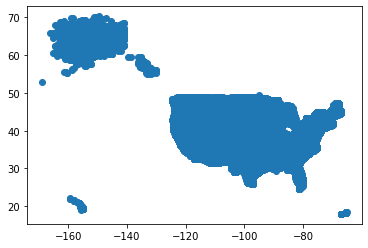

In [25]:
import csv
import matplotlib.pyplot as plt

fire_x = []
fire_y = []

with open('Data.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
    for row in spamreader:
        temp = row
        fire_x.append(temp[0])
        fire_y.append(temp[1])

plt.scatter(x=fire["LONGITUDE"], y=fire["LATITUDE"])
plt.show()

In [26]:
import os
files = os.listdir('Data_Files')
coor = []

for file in files:
    file = file.split('_')
    coor.append(str('%.4f'%float('-'+file[6].replace('d','.').replace('W','')))+','+str('%.4f'%float(file[5].replace('d','.').replace('N',''))))

In [27]:
new_data = []
for element in Data_csv_list:
    temp_ele = str(element[0])+','+str(element[1])
    if temp_ele not in coor:
        new_data.append(element)
print(len(new_data))

0


In [28]:
import csv
with open('Data.csv', 'w', newline='') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=',',quotechar='|', quoting=csv.QUOTE_MINIMAL)
    # spamwriter.writerow(['lat', 'long'])
    for val in new_data:
        spamwriter.writerow([val[0], val[1], val[2], val[3]])

In [10]:
import os
files = os.listdir('Data_Files')
file_list = []

for file_name in files:
    file = file_name.split('_')
    file_list.append([file_name, str('%.4f'%float('-'+file[6].replace('d','.').replace('W','')))+','+str('%.4f'%float(file[5].replace('d','.').replace('N','')))])

In [12]:
import os
files = os.listdir('Fire_Files')
Fire_Files = {}

for file_name in files:
    file = file_name.split('_')
    location = str('%.4f'%float('-'+file[6].replace('d','.').replace('W','')))+','+str('%.4f'%float(file[5].replace('d','.').replace('N','')))
    Fire_Files[location] = file_name

files = os.listdir('No_Fire_Files')
No_Fire_Files = {}

for file_name in files:
    file = file_name.split('_')
    location = str('%.4f'%float('-'+file[6].replace('d','.').replace('W','')))+','+str('%.4f'%float(file[5].replace('d','.').replace('N','')))
    No_Fire_Files[location] = file_name

In [13]:
def get_dur(row):
    start_date_str = jd2cal(row.iloc[0]["DISCOVERY_DATE"])
    start_date_str = start_date_str + ' '
    start_date_str = start_date_str + str(row.iloc[0]["DISCOVERY_TIME"])
    # print(start_date_str)
    start_date = datetime.datetime.strptime(start_date_str, '%m/%d/%Y %H%M')

    end_date_str = jd2cal(row.iloc[0]["CONT_DATE"])
    end_date_str = end_date_str + ' '
    end_date_str = end_date_str + str(row.iloc[0]["CONT_TIME"])
    end_date = datetime.datetime.strptime(end_date_str, '%m/%d/%Y %H%M')
    diff = (end_date-start_date).total_seconds() / 3600.0
    return diff 
    # (end_date-start_date).astype('timedelta64[h]')

In [31]:
Data_final = pd.DataFrame()
index = 0

print(len(Dataset_list))

with open('Data_Final_All.csv', 'w') as csv_file:  
    header = Dataset_list[0].columns.values.tolist()
    header.append("DUR")
    header.remove("LONG/LAT")
    header.remove("DISCOVERY_TIME")
    header.remove("CONT_DATE")
    header.remove("CONT_TIME")
    for ind1 in range(0,7):
        header.append("T2M_"+str(ind1))
        header.append("T2MDEW_"+str(ind1))
        header.append("T2MWET_"+str(ind1))
        header.append("TS_"+str(ind1))
        header.append("T2M_RANGE_"+str(ind1))
        header.append("T2M_MAX_"+str(ind1))
        header.append("T2M_MIN_"+str(ind1))
        header.append("QV2M_"+str(ind1))
        header.append("RH2M_"+str(ind1))
        header.append("PRECTOTCORR_"+str(ind1))
        header.append("PS_"+str(ind1))
        header.append("WS10M_"+str(ind1))
        header.append("WS10M_MAX_"+str(ind1))
        header.append("WS10M_MIN_"+str(ind1))
        header.append("WS10M_RANGE_"+str(ind1))
        header.append("WS50M_"+str(ind1))
        header.append("WS50M_MAX_"+str(ind1))
        header.append("WS50M_MIN_"+str(ind1))
        # T2M,T2MDEW,T2MWET,TS,T2M_RANGE,T2M_MAX,T2M_MIN,QV2M,RH2M,PRECTOTCORR,PS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN

    writer = csv.DictWriter(csv_file, fieldnames = header)
    writer.writeheader()
    for index, row in enumerate(Dataset_list):
        # print(index)
        # if(index == 0):
        #     writer.writerow(row.columns.values.tolist())
        Data_temp = {}
        Data_temp["LONGITUDE"] = row.iloc[0]["LONGITUDE"]
        Data_temp["LATITUDE"] = row.iloc[0]["LATITUDE"]
        Data_temp["DISCOVERY_DATE"] = jd2cal(row.iloc[0]["DISCOVERY_DATE"])
        Data_temp["DUR"] = get_dur(row)
        # print(Data_temp["DUR"])
        Data_temp["FIRE_SIZE"] = row.iloc[0]["FIRE_SIZE"]

        with open('Fire_Files/'+Fire_Files[row.iloc[0]["LONG/LAT"]], newline='') as csvfile1:
            spamreader = csv.reader(csvfile1, delimiter=',', quotechar='|')
            # print(Fire_Files[row.iloc[0]["LONG/LAT"]])
            for i in range(0,28):
                next(spamreader)
            for ind2,line in enumerate(spamreader):
                if(ind2>6):
                    break
                # Data_temp["T2M_"+str(ind2)] = line[3]
                # Data_temp["RH2M_"+str(ind2)] = line[11]
                # Data_temp["PS_"+str(ind2)] = line[13]
                # Data_temp["WS10M_"+str(ind2)] = line[14]
                Data_temp["T2M_"+str(ind2)] = line[3]
                Data_temp["T2MDEW_"+str(ind2)] = line[4]
                Data_temp["T2MWET_"+str(ind2)] = line[5]
                Data_temp["TS_"+str(ind2)] = line[6]
                Data_temp["T2M_RANGE_"+str(ind2)] = line[7]
                Data_temp["T2M_MAX_"+str(ind2)] = line[8]
                Data_temp["T2M_MIN_"+str(ind2)] = line[9]
                Data_temp["QV2M_"+str(ind2)] = line[10]
                Data_temp["RH2M_"+str(ind2)] = line[11]
                Data_temp["PRECTOTCORR_"+str(ind2)] = line[12]
                Data_temp["PS_"+str(ind2)] = line[13]
                Data_temp["WS10M_"+str(ind2)] = line[14]
                Data_temp["WS10M_MAX_"+str(ind2)] = line[15]
                Data_temp["WS10M_MIN_"+str(ind2)] = line[16]
                Data_temp["WS10M_RANGE_"+str(ind2)] = line[17]
                Data_temp["WS50M_"+str(ind2)] = line[18]
                Data_temp["WS50M_MAX_"+str(ind2)] = line[19]
                Data_temp["WS50M_MIN_"+str(ind2)] = line[20]

        # for key, value in Data_temp.items():
        #     writer.writerow([key, value])
        #Data_final.append(Data_temp,ignore_index=True)
        # Data_final = pd.concat([Data_final, pd.DataFrame(Data_temp,index=[0])], ignore_index=True)
        writer.writerow(Data_temp)

        Data_temp["DUR"] = 0
        Data_temp["FIRE_SIZE"] = 0
        Data_temp["DISCOVERY_DATE"] = jd2cal(row.iloc[0]['CONT_DATE']+90)
        with open('No_Fire_Files/'+No_Fire_Files[row.iloc[0]["LONG/LAT"]], newline='') as csvfile2:
            spamreader = csv.reader(csvfile2, delimiter=',', quotechar='|')
            for i in range(0,28):
                next(spamreader)
            for ind3,line in enumerate(spamreader):
                if(ind3>6):
                    break
                # Data_temp["T2M_"+str(ind3)] = line[3]
                # Data_temp["RH2M_"+str(ind3)] = line[11]
                # Data_temp["PS_"+str(ind3)] = line[13]
                # Data_temp["WS10M_"+str(ind3)] = line[14]
                Data_temp["T2M_"+str(ind3)] = line[3]
                Data_temp["T2MDEW_"+str(ind3)] = line[4]
                Data_temp["T2MWET_"+str(ind3)] = line[5]
                Data_temp["TS_"+str(ind3)] = line[6]
                Data_temp["T2M_RANGE_"+str(ind3)] = line[7]
                Data_temp["T2M_MAX_"+str(ind3)] = line[8]
                Data_temp["T2M_MIN_"+str(ind3)] = line[9]
                Data_temp["QV2M_"+str(ind3)] = line[10]
                Data_temp["RH2M_"+str(ind3)] = line[11]
                Data_temp["PRECTOTCORR_"+str(ind3)] = line[12]
                Data_temp["PS_"+str(ind3)] = line[13]
                Data_temp["WS10M_"+str(ind3)] = line[14]
                Data_temp["WS10M_MAX_"+str(ind3)] = line[15]
                Data_temp["WS10M_MIN_"+str(ind3)] = line[16]
                Data_temp["WS10M_RANGE_"+str(ind3)] = line[17]
                Data_temp["WS50M_"+str(ind3)] = line[18]
                Data_temp["WS50M_MAX_"+str(ind3)] = line[19]
                Data_temp["WS50M_MIN_"+str(ind3)] = line[20]

        # Data_final = pd.concat([Data_final, pd.DataFrame(Data_temp,index=[0])], ignore_index=True)
        # Data_final = Data_final.append(Data_temp,ignore_index=True)
        # for key, value in Data_temp.items():
        #     writer.writerow([key, value])
        writer.writerow(Data_temp)

        if(index%1000==0):
            print(index)

23798
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000


In [9]:
Data_final_csv = pd.read_csv('Data_final.csv')
Data_final_csv.drop(Data_final_csv.columns[0],axis=1,inplace=True)

In [10]:
Data_final_csv.head(10)

,LONGITUDE,LATITUDE,DISCOVERY_DATE,FIRE_SIZE,DUR,T2M_0,T2MDEW_0,T2MWET_0,TS_0,T2M_RANGE_0,...,RH2M_6,PRECTOTCORR_6,PS_6,WS10M_6,WS10M_MAX_6,WS10M_MIN_6,WS10M_RANGE_6,WS50M_6,WS50M_MAX_6,WS50M_MIN_6
0,-120.966667,40.144722,12/07/2015,0.1,0.500000,1.58,-3.03,-0.72,0.77,13.21,...,94.81,1.12,87.17,2.12,3.19,1.54,1.65,4.15,5.34,3.21
1,-120.966667,40.144722,03/06/2016,0.0,0.000000,6.94,-0.03,3.46,4.23,7.54,...,94.00,27.23,85.64,3.88,4.84,2.30,2.54,6.80,8.51,3.96
2,-120.355278,38.868611,08/07/2014,0.1,3.000000,22.87,1.39,12.13,22.23,13.55,...,48.94,0.12,81.16,1.84,3.06,1.27,1.80,2.58,4.10,1.46
3,-120.355278,38.868611,11/05/2014,0.0,0.000000,9.26,-3.20,3.02,7.68,13.57,...,61.25,0.00,81.59,2.52,3.38,1.47,1.91,3.71,4.65,2.31
4,-120.759600,39.024200,10/18/2015,0.1,4.600000,20.80,3.71,12.25,18.40,15.53,...,82.00,0.84,87.50,1.65,3.28,0.77,2.52,2.66,4.55,1.63
5,-120.759600,39.024200,01/16/2016,0.0,0.000000,1.58,-0.25,0.66,0.87,8.33,...,98.25,10.65,87.93,2.13,2.86,1.30,1.55,4.25,5.96,2.81
6,-119.745833,38.595000,08/01/2015,0.1,5.750000,16.12,-2.01,7.05,14.89,16.13,...,45.88,1.01,80.87,1.62,3.05,0.34,2.71,2.85,4.23,0.54
7,-119.745833,38.595000,10/30/2015,0.0,0.000000,9.66,-2.76,3.45,7.82,14.30,...,43.56,0.00,80.73,2.43,3.71,1.14,2.57,4.15,5.75,1.59
8,-120.088611,38.485000,09/20/2015,0.5,9.716667,13.36,5.70,9.53,13.40,10.84,...,20.94,0.00,80.77,2.34,3.68,0.88,2.80,3.55,5.01,1.80
9,-120.088611,38.485000,12/19/2015,0.0,0.000000,-2.83,-3.29,-3.06,-2.91,7.12,...,97.31,8.20,79.88,2.56,4.09,0.95,3.14,4.24,6.37,1.16


In [11]:
Data_final_csv.to_csv('Data_final.csv')

In [12]:
corrM = Data_final_csv.corr()

# corrM.style.background_gradient(cmap='coolwarm').set_properties(**{'font-size': '0pt'})

In [13]:
corrM.drop(['DUR','FIRE_SIZE'],inplace=True,axis=1)

In [18]:
Plot_data = corrM.iloc[2]
Plot_data

LONGITUDE       -0.102864
LATITUDE         0.109810
T2M_0            0.016605
T2MDEW_0         0.013651
T2MWET_0         0.016170
                   ...   
WS10M_MIN_6     -0.017313
WS10M_RANGE_6   -0.015609
WS50M_6         -0.023427
WS50M_MAX_6     -0.022000
WS50M_MIN_6     -0.016456
Name: FIRE_SIZE, Length: 128, dtype: float64

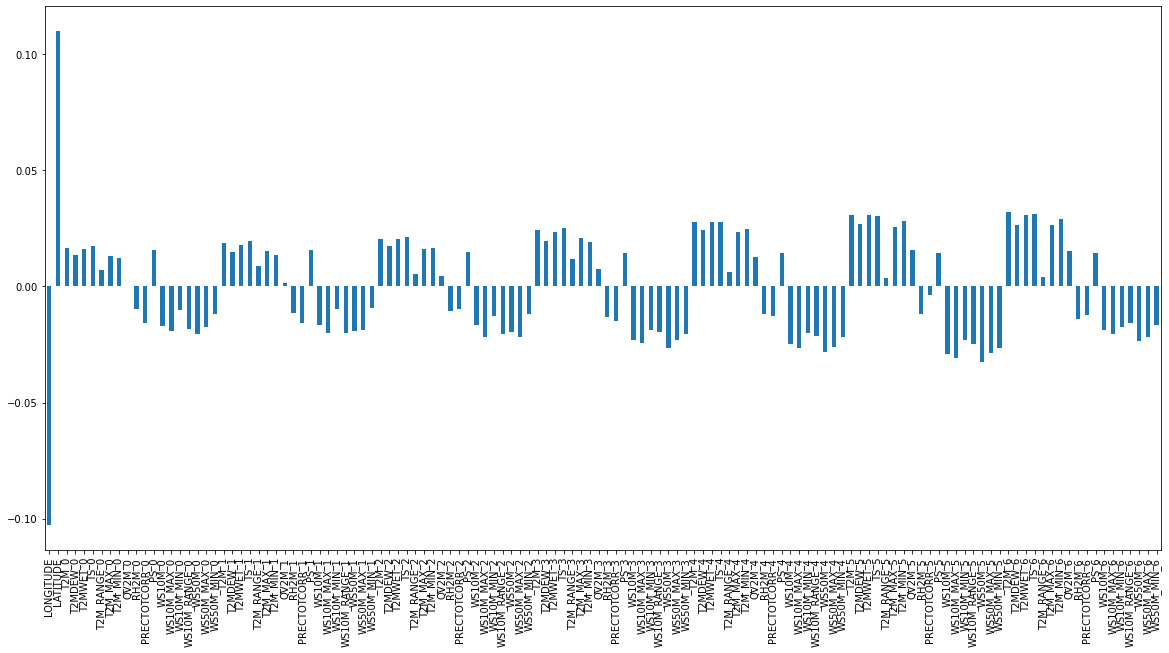

In [21]:
ax = Plot_data.plot.bar(x='lab', y='val', rot=90,figsize=(20,10))

In [73]:
Data_final_csv=Data_final_csv.drop(header, axis=1)

In [80]:
Data_final_csv['DOY'] = ''
for index,row in Data_final_csv.iterrows():
    Data_final_csv.at[index,'DOY']= datetime.datetime.strptime(Data_final_csv.loc[index]['DISCOVERY_DATE'], '%m/%d/%Y').timetuple().tm_yday 

In [1]:
import sys


def progress(count, total, status=''):
    bar_len = 60
    filled_len = int(round(bar_len * count / float(total)))

    percents = round(100.0 * count / float(total), 1)
    bar = '=' * filled_len + '-' * (bar_len - filled_len)

    sys.stdout.write('[%s] %s%s ...%s\r' % (bar, percents, '%', status))
    sys.stdout.flush()  # As suggested by Rom Ruben (see: http://stackoverflow.com/questions/3173320/text-progress-bar-in-the-console/27871113#comment50529068_27871113)


In [3]:
import os
files = os.listdir('Data_Files_1')
W_Data_Dict = {}

for file_cnt,file_name in enumerate(files):
    file = file_name.split('_')
    location = str('%.4f'%float('-'+file[6].replace('d','.').replace('W','')))+','+str('%.4f'%float(file[5].replace('d','.').replace('N','')))
    with open('Data_Files_1/'+file_name, newline='') as csvfile:
        spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
        Data_temp = []
        for i in range(0,27):
            next(spamreader)
        for index,line in enumerate(spamreader):
            Data_temp.append(line)
            # Data_temp.append([line[3],line[11],line[13],line[14]])
        W_Data_Dict[location] = Data_temp
    


In [4]:
import pickle
import os
from fsplit.filesplit import Filesplit

if not os.path.exists("W_Data"):
    os.makedirs("W_Data")

with open('W_Data/W_Data_Dict.pickle', 'wb') as handle:
    pickle.dump(W_Data_Dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

fs = Filesplit()
def split_cb(f, s):
    print("file: {0}, size: {1}".format(f, s))
fs.split(file="W_Data/W_Data_Dict.pickle", split_size=50000000, output_dir="W_Data", callback=split_cb)
os.remove("W_Data/W_Data_Dict.pickle")

file: W_Data\W_Data_Dict_1.pickle, size: 50000000
file: W_Data\W_Data_Dict_2.pickle, size: 50000000
file: W_Data\W_Data_Dict_3.pickle, size: 50000000
file: W_Data\W_Data_Dict_4.pickle, size: 50000000
file: W_Data\W_Data_Dict_5.pickle, size: 50000000
file: W_Data\W_Data_Dict_6.pickle, size: 50000000
file: W_Data\W_Data_Dict_7.pickle, size: 50000000
file: W_Data\W_Data_Dict_8.pickle, size: 50000000
file: W_Data\W_Data_Dict_9.pickle, size: 50000000
file: W_Data\W_Data_Dict_10.pickle, size: 50000000
file: W_Data\W_Data_Dict_11.pickle, size: 50000000
file: W_Data\W_Data_Dict_12.pickle, size: 50000000
file: W_Data\W_Data_Dict_13.pickle, size: 50000000
file: W_Data\W_Data_Dict_14.pickle, size: 50000000
file: W_Data\W_Data_Dict_15.pickle, size: 50000000
file: W_Data\W_Data_Dict_16.pickle, size: 50000000
file: W_Data\W_Data_Dict_17.pickle, size: 980971
